## Dependencies

In [57]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [58]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf

In [59]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

### Keras Specific Dependencies

In [60]:
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

## Loading and Preprocessing our Data

### Load the Fashion MNIST Dataset from Keras

In [61]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [62]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [63]:
## Explore the data

In [64]:
train_images.shape

(60000, 28, 28)

In [65]:
len(train_labels)

60000

In [66]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [67]:
test_images.shape

(10000, 28, 28)

In [68]:
len(test_labels)

10000

### Preprocess the data

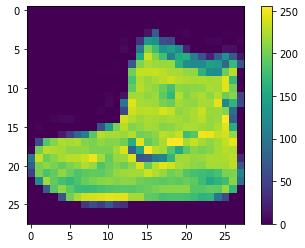

In [69]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Each Image is a 28x28 Pixel greyscale image with values from 0 to 255

In [70]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [71]:
## verify the data

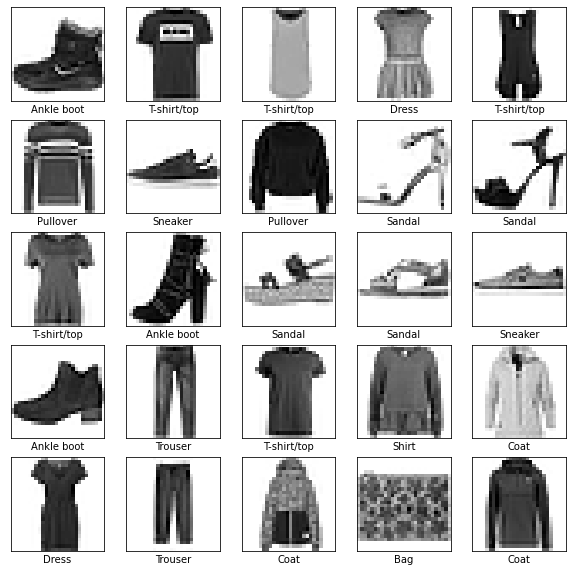

In [72]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [74]:
## Compile the model

In [75]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the MODEL


In [76]:
## Feed the model

In [78]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2322 - accuracy: 0.9125
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2266 - accuracy: 0.9153
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2165 - accuracy: 0.9190
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2123 - accuracy: 0.9200
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2055 - accuracy: 0.9233: 0s - l
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1995 - accuracy: 0.9260
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1933 - accuracy: 0.9281
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1887 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1832 - accuracy: 0.9316
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - los

## Saving and Loading models

We can save our trained models using the HDF5 binary format with the extension `.h5`

In [79]:
# Save the model
model.save("trained_model.h5")

In [80]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("trained_model.h5")

## Evaluating the Model


In [81]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3701 - accuracy: 0.8803

Test accuracy: 0.880299985408783


## Make predictions
We can use our trained model to make predictions using model.predict

In [82]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [83]:
predictions = probability_model.predict(test_images)

In [84]:
predictions[0]

array([1.7512715e-12, 1.9457382e-15, 7.2859954e-11, 7.7740724e-19,
       8.7233643e-09, 6.2712439e-05, 3.7431124e-11, 1.8166324e-01,
       2.1345559e-11, 8.1827402e-01], dtype=float32)

In [85]:
np.argmax(predictions[0])

9

In [86]:
test_labels[0]

9

In [87]:
## Graph this to look at the full set of 10 class predictions

In [88]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [89]:
## Verify predictions

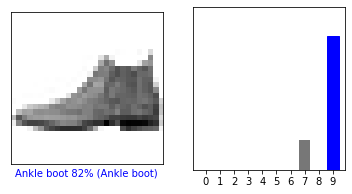

In [90]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

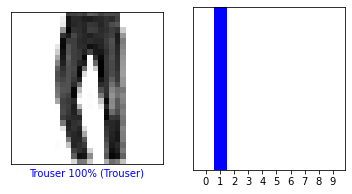

In [91]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

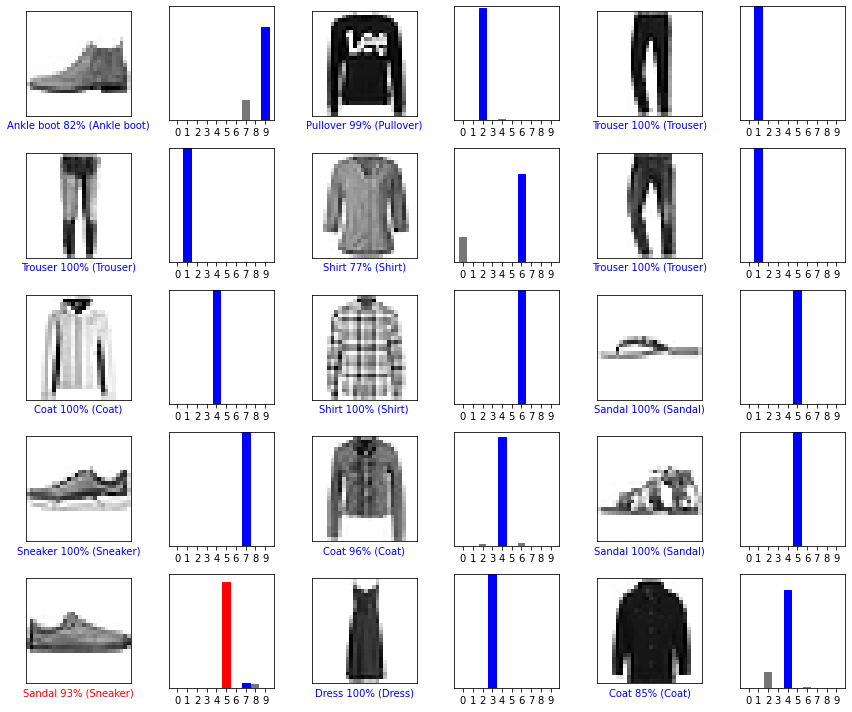

In [92]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [93]:
## Use the trained model

# Import a Custom Image

In [94]:
filepath = "Images/tshirt.png"

In [95]:
from tensorflow.keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

In [96]:
# Convert the image to a numpy array 
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [97]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

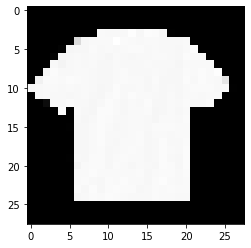

In [98]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

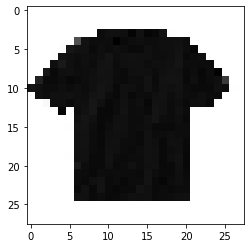

In [99]:
# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [100]:
# Make predictions


In [101]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.14712557e-03 1.29664015e-14 3.55118436e-06 8.67406106e-06
  1.47649786e-03 2.77631407e-16 9.93356764e-01 1.85682456e-13
  7.38958897e-06 3.97679724e-15]]


In [102]:
predictions_percentage = np.round(predictions_single, 3)*100
print(predictions_percentage)

[[ 0.5       0.        0.        0.        0.1       0.       99.299995
   0.        0.        0.      ]]


In [103]:
res = probability_model.predict(img)
results = [[i,r] for i,r in enumerate(res)]
results.sort(key=lambda x: x[1], reverse=True)
for r in results:
    print(class_names, str(r[1]))
    
print(predictions_percentage)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] [5.14712557e-03 1.29664015e-14 3.55118436e-06 8.67406106e-06
 1.47649786e-03 2.77631407e-16 9.93356764e-01 1.85682456e-13
 7.38958897e-06 3.97679724e-15]
[[ 0.5       0.        0.        0.        0.1       0.       99.299995
   0.        0.        0.      ]]


In [104]:
results

[[0,
  array([5.14712557e-03, 1.29664015e-14, 3.55118436e-06, 8.67406106e-06,
         1.47649786e-03, 2.77631407e-16, 9.93356764e-01, 1.85682456e-13,
         7.38958897e-06, 3.97679724e-15], dtype=float32)]]

In [105]:
predictions_single

array([[5.14712557e-03, 1.29664015e-14, 3.55118436e-06, 8.67406106e-06,
        1.47649786e-03, 2.77631407e-16, 9.93356764e-01, 1.85682456e-13,
        7.38958897e-06, 3.97679724e-15]], dtype=float32)

In [106]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

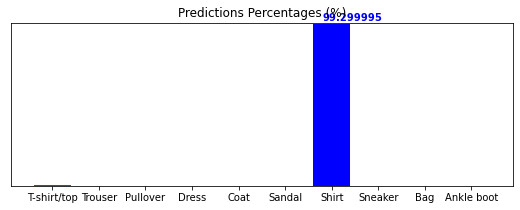

In [107]:
# Create our figure and data we'll use for plotting
fig, ax = plt.subplots(figsize=(9, 3))

color=['red']*len(predictions_percentage[0])

np_predictions_percentage = np.array(predictions_percentage[0])
max_index_col = np.argmax(np_predictions_percentage, axis=0)

color[max_index_col]='blue'

ax.bar(class_names, predictions_percentage[0], color=color)

ax.grid(False)
ax.set_xticks(range(10))
ax.set_yticks([])
ax.set_title("Predictions Percentages (%)")

ax.set_ylim([0, 100])
predicted_label = np.argmax(predictions_percentage[0])

for j, p in enumerate(predictions_percentage[0]):
    if p>1:
        ax.text(j-0.2, p+2, str(p), color='blue', fontweight='bold')

In [108]:
np.argmax(predictions_single[0])

6